In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#load trained 

# Function to load images and their labels
def load_data(directory):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(directory)):
        class_directory = os.path.join(directory, class_name)
        for image_name in os.listdir(class_directory):
            image = cv2.imread(os.path.join(class_directory, image_name))
            image = cv2.resize(image, (64, 64))  # Resize image if necessary
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load data from folders
X, y = load_data("beras")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten images (if necessary) and normalize pixel values
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Evaluate K-NN model
knn_predictions = knn_model.predict(X_test)
print("K-NN Classification Report:")
print(classification_report(y_test, knn_predictions))



SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       1.00      1.00      1.00         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



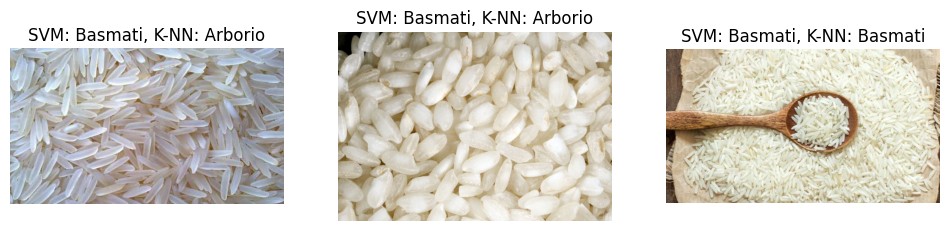

In [8]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # Resize image if necessary
    image = image.reshape(1, -1) / 255.0  # Flatten and normalize image
    return image

# Load and preprocess three images
image_paths = ['testing/1.jpg', 'testing/2.jpg', 'testing/3.jpeg']  # Ganti dengan jalur gambar yang ingin diuji
preprocessed_images = [preprocess_image(image_path) for image_path in image_paths]

# Predict using SVM model
svm_predictions = [svm_model.predict(image)[0] for image in preprocessed_images]

# Predict using K-NN model
knn_predictions = [knn_model.predict(image)[0] for image in preprocessed_images]

# Map numerical predictions to labels
label_map = {0: 'Arborio', 1: 'Basmati', 2: 'Karacadag'}

# Convert numerical predictions to labels
svm_predictions_labels = [label_map[prediction] for prediction in svm_predictions]
knn_predictions_labels = [label_map[prediction] for prediction in knn_predictions]

# Plot images and predictions using subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    axs[i].set_title(f'SVM: {svm_predictions_labels[i]}, K-NN: {knn_predictions_labels[i]}')

plt.show()